### Get CIFAR 10 from Keras

In [1]:
from __future__ import print_function
import numpy as np

from keras.datasets import cifar10
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [2]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

In [3]:
np.random.seed(1337) # Very l33t

In [4]:
# Defines how many images we will process at once
batch_size = 128

In [5]:
# Defines how many types of objects we can detect in this set. 
# Since CIFAR 10 only detects 10 kinds of objects, we set this to 10.
nb_classes = 10

In [6]:
# The epoch defines how long we train the system.  Longer is not always better. 
# After a period of time we reach the point of diminishing returns.  Adjust this as necessary.
nb_epoch = 45

In [7]:
# Here we put in the image dimensions.  We know the images are 32 x 32.  
# They are already preprocessed for us to be nicely uniform to work with at this point.
img_rows, img_cols = 32, 32

In [8]:
# Here we set the number of convolutional filters to use
nb_filters = 32

In [9]:
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

In [10]:
# This splits the data into training and test sets and loads the data.  
# Cifar10 is a standard test data set for Keras so it can download it automatically.  It's about 186MB expanded.

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [11]:
# Unfortunately, TensorFlow and Theano want their tenor parameters in a different order,
# so we check for the backend from the json initialization file and set them accordingly.

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [12]:
# convert class vectors to binary class matrices

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [13]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

/Users/alex/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(32, 32, 3...)`
  """
/Users/alex/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys


In [14]:
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

/Users/alex/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [15]:
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [1]:
# Set up TensorBoard
tb = TensorBoard(log_dir='./logs')

NameError: name 'TensorBoard' is not defined

In [17]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_test, Y_test), callbacks=[tb])

score = model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0])
print("Accuracy: %.2f%%" % (score[1]*100))

/Users/alex/anaconda/lib/python2.7/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/45
50000/50000 [==============================] - 177s 4ms/step - loss: 1.7250 - acc: 0.3636 - val_loss: 1.3990 - val_acc: 0.5025
Epoch 2/45
50000/50000 [==============================] - 183s 4ms/step - loss: 1.3859 - acc: 0.4981 - val_loss: 1.2231 - val_acc: 0.5734
Epoch 3/45
50000/50000 [==============================] - 183s 4ms/step - loss: 1.2502 - acc: 0.5552 - val_loss: 1.0946 - val_acc: 0.6226
Epoch 4/45
50000/50000 [==============================] - 174s 3ms/step - loss: 1.1480 - acc: 0.5931 - val_loss: 1.0412 - val_acc: 0.6337
Epoch 5/45
50000/50000 [==============================] - 171s 3ms/step - loss: 1.0744 - acc: 0.6199 - val_loss: 0.9436 - val_acc: 0.6719
Epoch 6/45
50000/50000 [==============================] - 145s 3ms/step - loss: 1.0212 - acc: 0.6437 - val_loss: 0.9395 - val_acc: 0.6731
Epoch 7/45
50000/50000 [==============================] - 144s 3ms/step - loss: 0.9767 - acc: 0.6558 - val_loss: 0.8833 - 

In [19]:
# tensorboard --logdir=./logs
# go to 127.0.1.1:6006

In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 32)        0         
__________

## Plot model

In [17]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

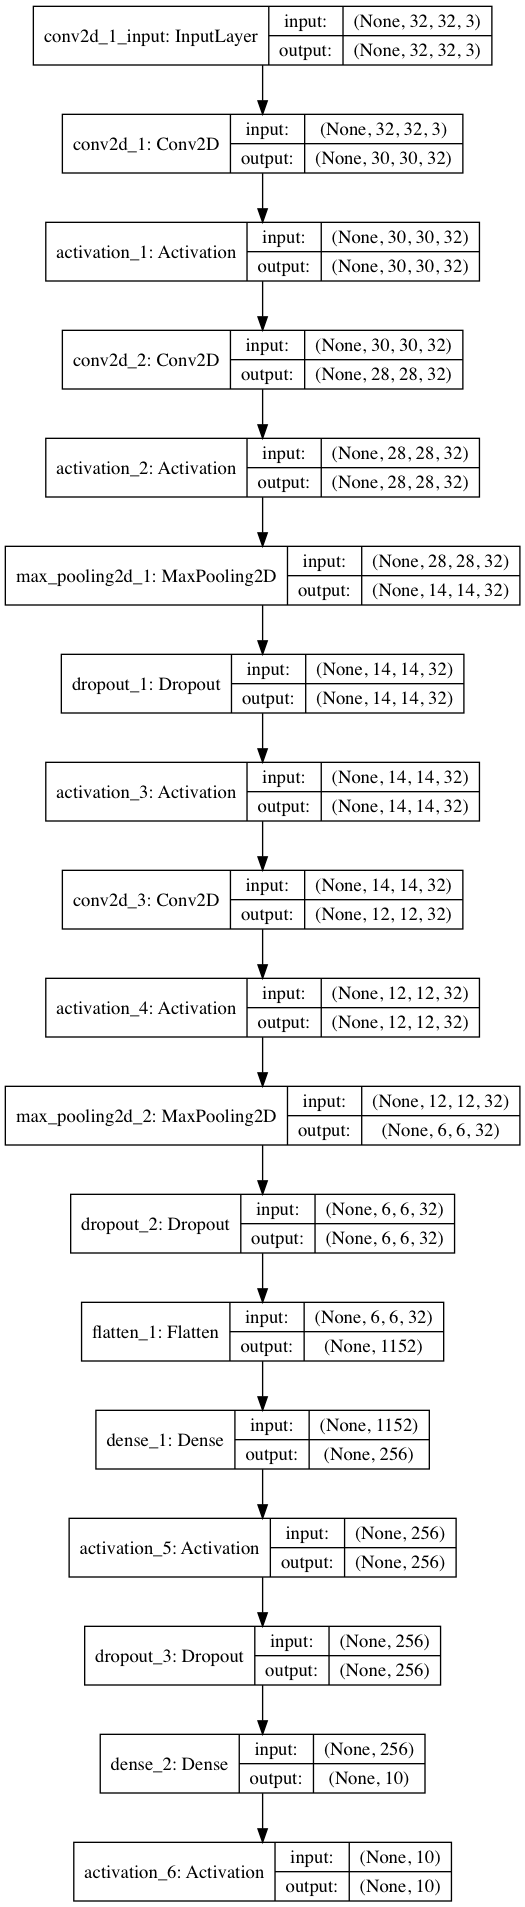

In [18]:
Image(filename='model_plot.png')